In [2]:
import os
os.sys.path.append('./scripts')

# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from implementations import *
%load_ext autoreload
%autoreload 2

In [3]:
from proj1_helpers import *
DATA_TRAIN_PATH = 'data/train.csv'
y_train, X_train, ids = load_csv_data(DATA_TRAIN_PATH, sub_sample=True)

# Exploratory data analysis

## Basics

In [4]:
#imports
import pandas as pd

#load the statistical libraries
from statsmodels.stats import diagnostic
from scipy import stats

train_data = pd.read_csv(DATA_TRAIN_PATH, na_values=[-999])

In [5]:
train_data.head()

,Id,Prediction,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,100000,s,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,...,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497
1,100001,b,160.937,68.768,103.235,48.146,NaN,NaN,NaN,3.473,...,-1.916,164.546,1,46.226,0.725,1.158,NaN,NaN,NaN,46.226
2,100002,b,NaN,162.172,125.953,35.635,NaN,NaN,NaN,3.148,...,-2.186,260.414,1,44.251,2.053,-2.028,NaN,NaN,NaN,44.251
3,100003,b,143.905,81.417,80.943,0.414,NaN,NaN,NaN,3.310,...,0.060,86.062,0,NaN,NaN,NaN,NaN,NaN,NaN,0.000
4,100004,b,175.864,16.915,134.805,16.405,NaN,NaN,NaN,3.891,...,-0.871,53.131,0,NaN,NaN,NaN,NaN,NaN,NaN,0.000


In [6]:
train_data = train_data.dropna()
train_data.head()

,Id,Prediction,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,100000,s,138.470,51.655,97.827,27.980,0.910,124.711,2.666,3.064,...,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.240,-2.475,113.497
5,100005,b,89.744,13.550,59.149,116.344,2.636,284.584,-0.540,1.362,...,2.237,282.849,3,90.547,-2.412,-0.653,56.165,0.224,3.106,193.660
6,100006,s,148.754,28.862,107.782,106.130,0.733,158.359,0.113,2.941,...,-1.443,294.074,2,123.010,0.864,1.450,56.867,0.131,-2.767,179.877
11,100011,b,114.744,10.286,75.712,30.816,2.563,252.599,-1.401,2.888,...,2.148,290.547,3,76.773,-0.790,0.303,56.876,1.773,-2.079,165.640
23,100023,s,141.481,0.736,111.581,174.075,1.955,364.344,-0.923,1.335,...,-0.973,454.785,2,195.533,1.156,1.416,82.477,-0.798,-2.785,278.009


## Features exploration

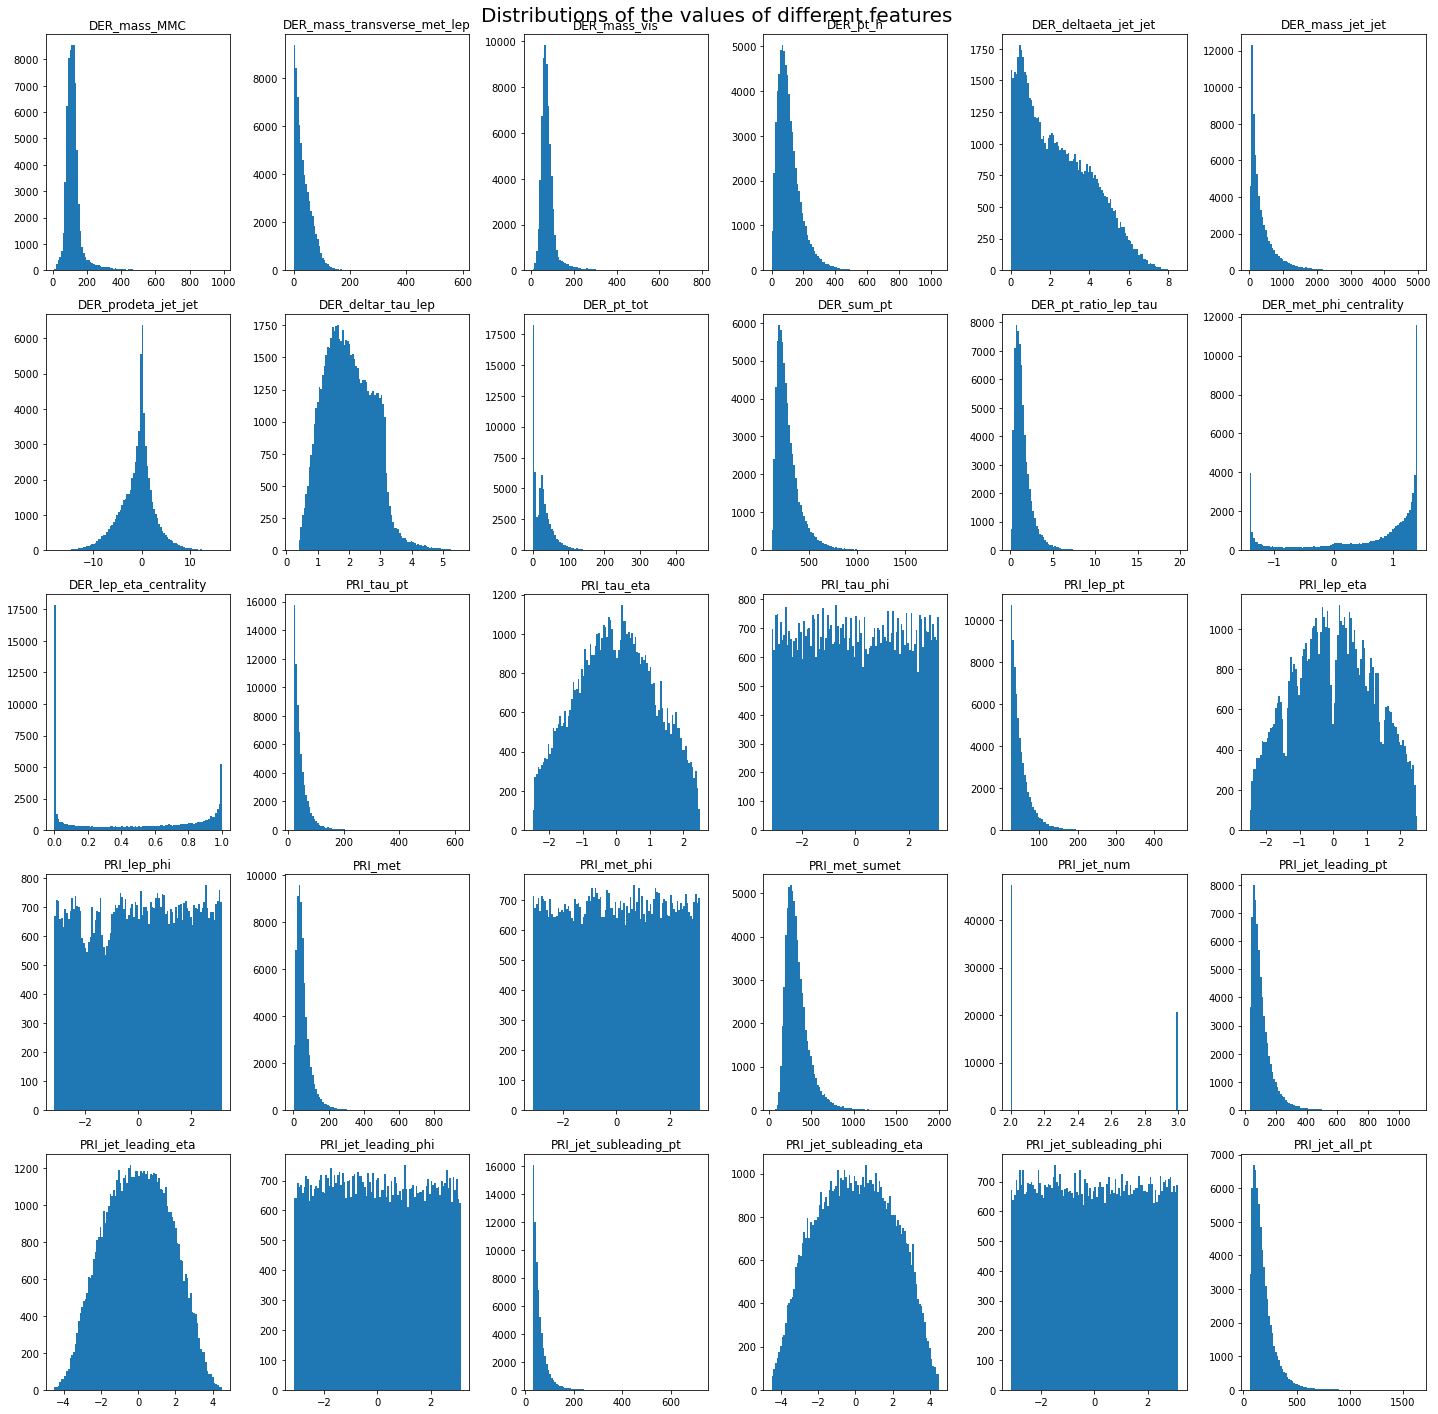

In [8]:
#plot the distributions of each features
fig, axs = plt.subplots(5,6, figsize=(20,20))
for i in range(30):
    axs[int((i-i%6)/5), int(i%6)].hist(train_data[features[i+2]], bins=100) 
    axs[int((i-i%6)/5), int(i%6)].set_title(f'{features[i+2]}')

fig.suptitle('Distributions of the values of different features', fontsize=20)
fig.tight_layout()

In [9]:
#filter the pairs of same distributions
same_dist_pairs=[]
for i in range(features.size-2):
    for j in range(i+1, features.size-2):
        stat, pval = stats.ks_2samp(train_data[features[i+2]],train_data[features[j+2]])
        if pval>0.01: 
            same_dist_pairs.append((features[i+2],features[j+2]))

same_dist_pairs

[('PRI_tau_phi', 'PRI_met_phi'),
 ('PRI_tau_phi', 'PRI_jet_leading_phi'),
 ('PRI_tau_phi', 'PRI_jet_subleading_phi'),
 ('PRI_met_phi', 'PRI_jet_leading_phi'),
 ('PRI_met_phi', 'PRI_jet_subleading_phi'),
 ('PRI_jet_leading_phi', 'PRI_jet_subleading_phi')]

In [51]:
#filter different distibutions
#normal_dist=[]
#uniform_dist=[]
#for i in range(features.size-2):
#    stat, pval = stats.kstest(train_data[features[i+2]], 'norm') 
#    if pval>0.001: 
#        normal_dist.append(features[i+2])
#    stat, pval = stats.kstest(train_data[features[i+2]], 'uniform') 
#    if pval>0.001: 
#        uniform_dist.append(features[i+2])
        
# too big noise to recoginse anything fro this test

In [52]:
# cross scatters, first we need another correlation check 
#features = train_data.columns
#fig, axs = plt.subplots(5, 5, figsize=(20,20))
#for i in range(5):
#    for j in range(5): 
#        axs[i-1,j-1].scatter(train_data[features[i+2]],train_data[features[j+2]], s=0.1)   

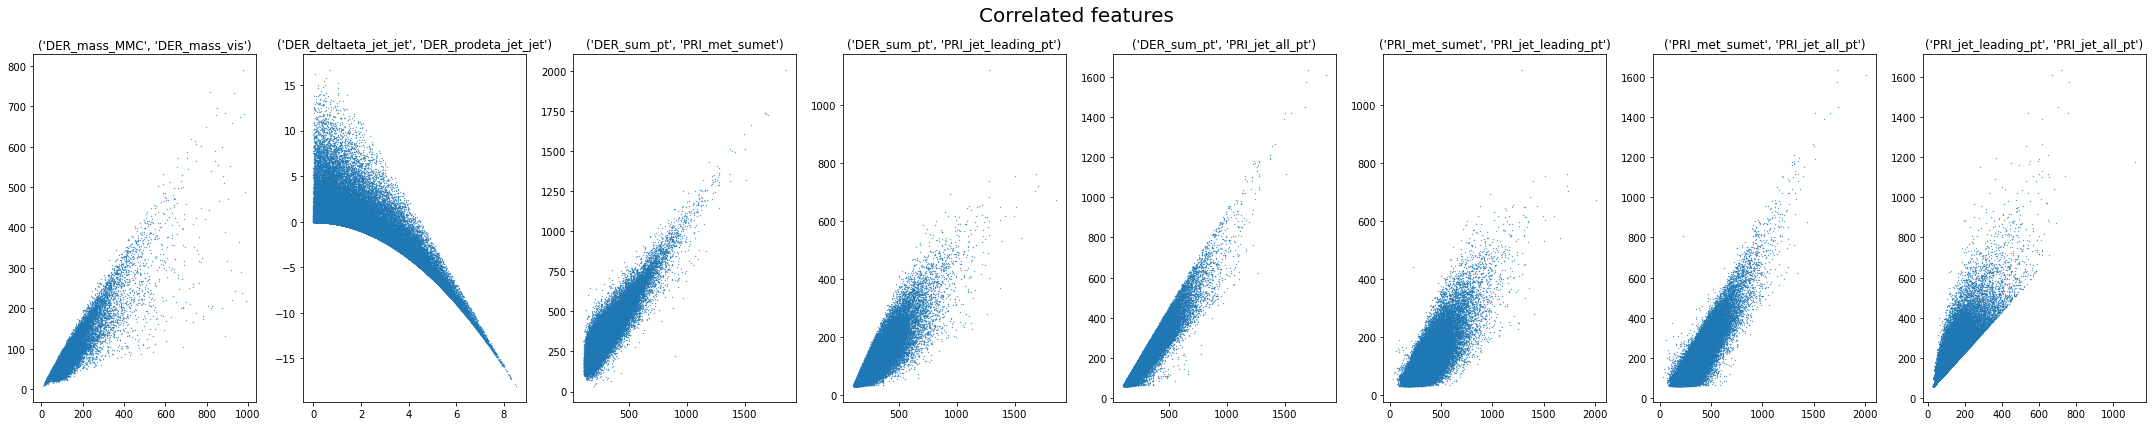

In [50]:
#correlation check
corr_pairs = []
for i in range(features.size-2):
    for j in range(i+1, features.size-2):
        corr = np.corrcoef(train_data[features[i+2]],train_data[features[j+2]])
        if abs(corr[0,1])>0.8: 
            corr_pairs.append((features[i+2],features[j+2]))

fig, axs = plt.subplots(1,len(corr_pairs), figsize=(30,6))
for i in range(len(corr_pairs)): 
    axs[i].scatter(train_data[corr_pairs[i][0]],train_data[corr_pairs[i][1]], s=0.1)
    axs[i].set_title(f'{corr_pairs[i]}')

fig.suptitle('Correlated features',  fontsize=20)
fig.tight_layout()

# Filtered data

In [59]:
train_data_s = train_data[train_data['Prediction']=='s']
train_data_b = train_data[train_data['Prediction']=='b']

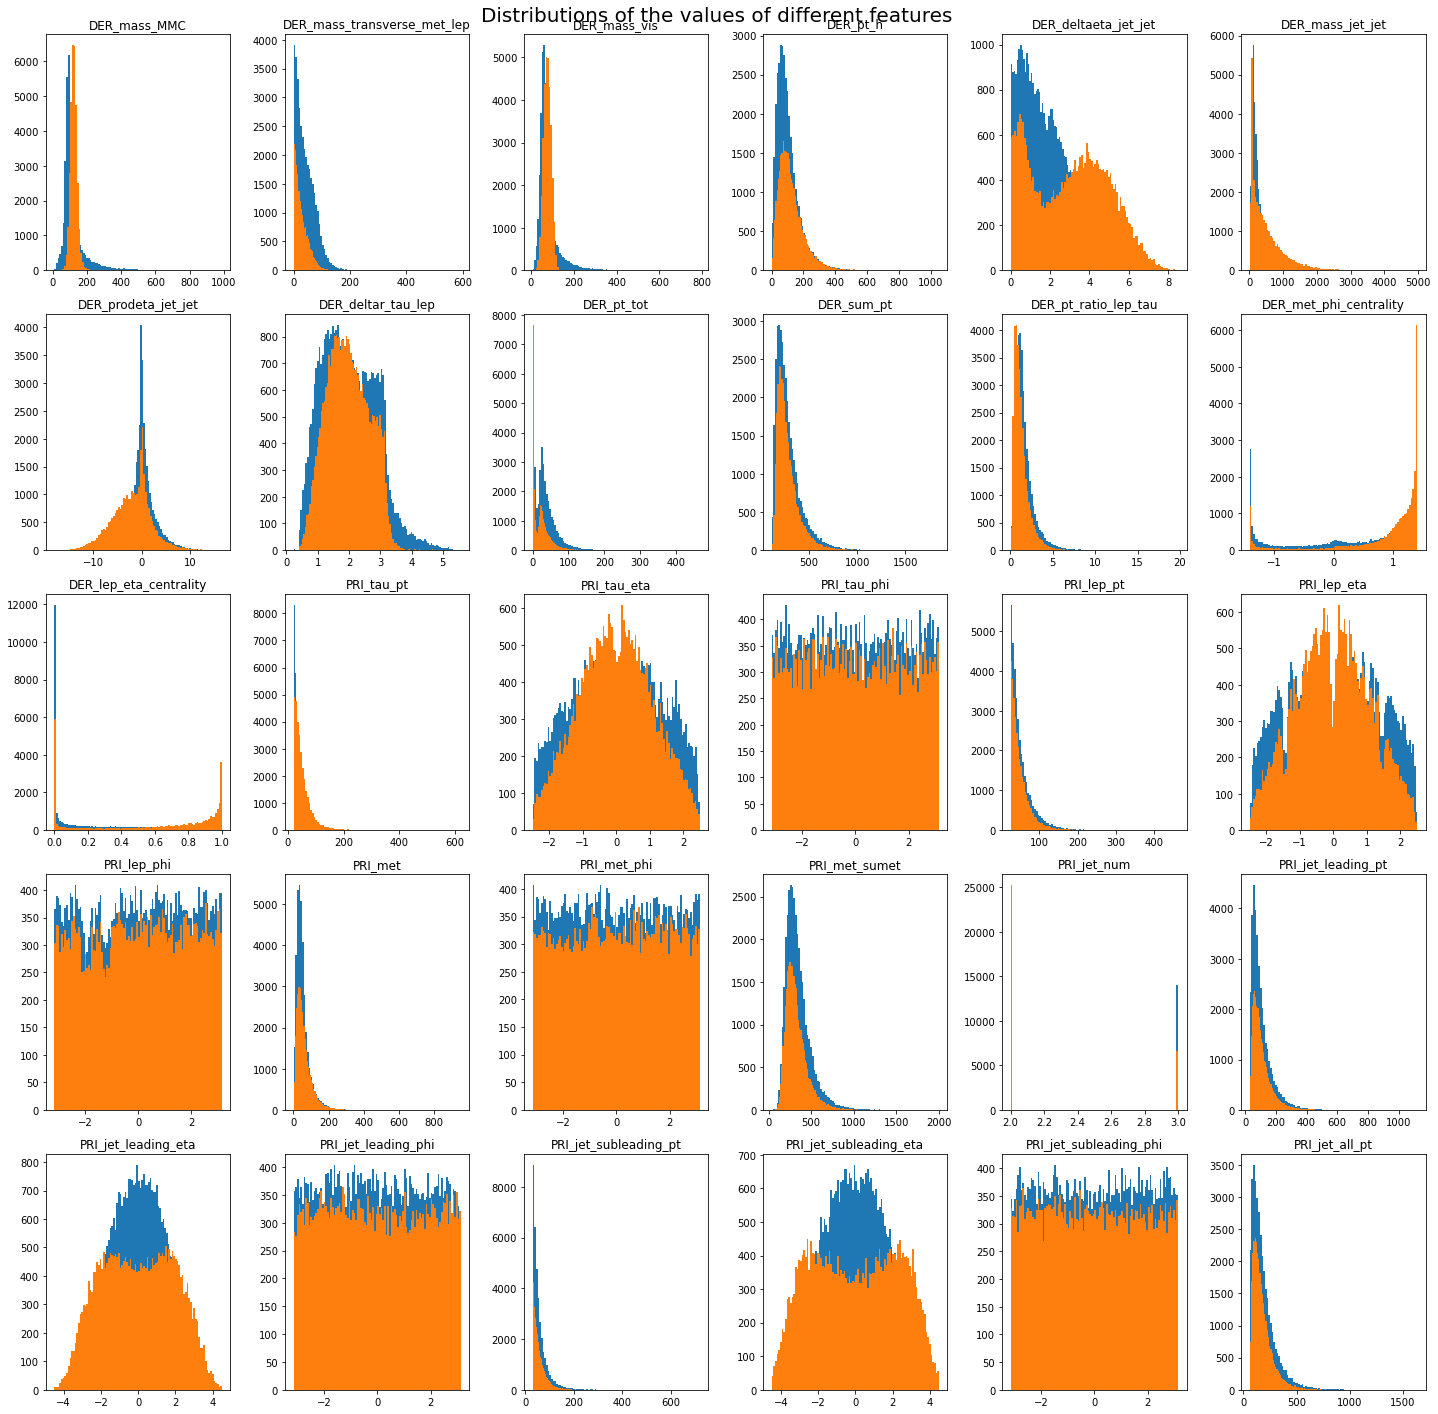

In [61]:
#plot the distributions of each features
fig, axs = plt.subplots(5,6, figsize=(20,20))
for i in range(30):
    axs[int((i-i%6)/5), int(i%6)].hist(train_data_b[features[i+2]], bins=100) 
    axs[int((i-i%6)/5), int(i%6)].hist(train_data_s[features[i+2]], bins=100) 
    
    axs[int((i-i%6)/5), int(i%6)].set_title(f'{features[i+2]}')

fig.suptitle('Distributions of the values of different features', fontsize=20)
fig.tight_layout()

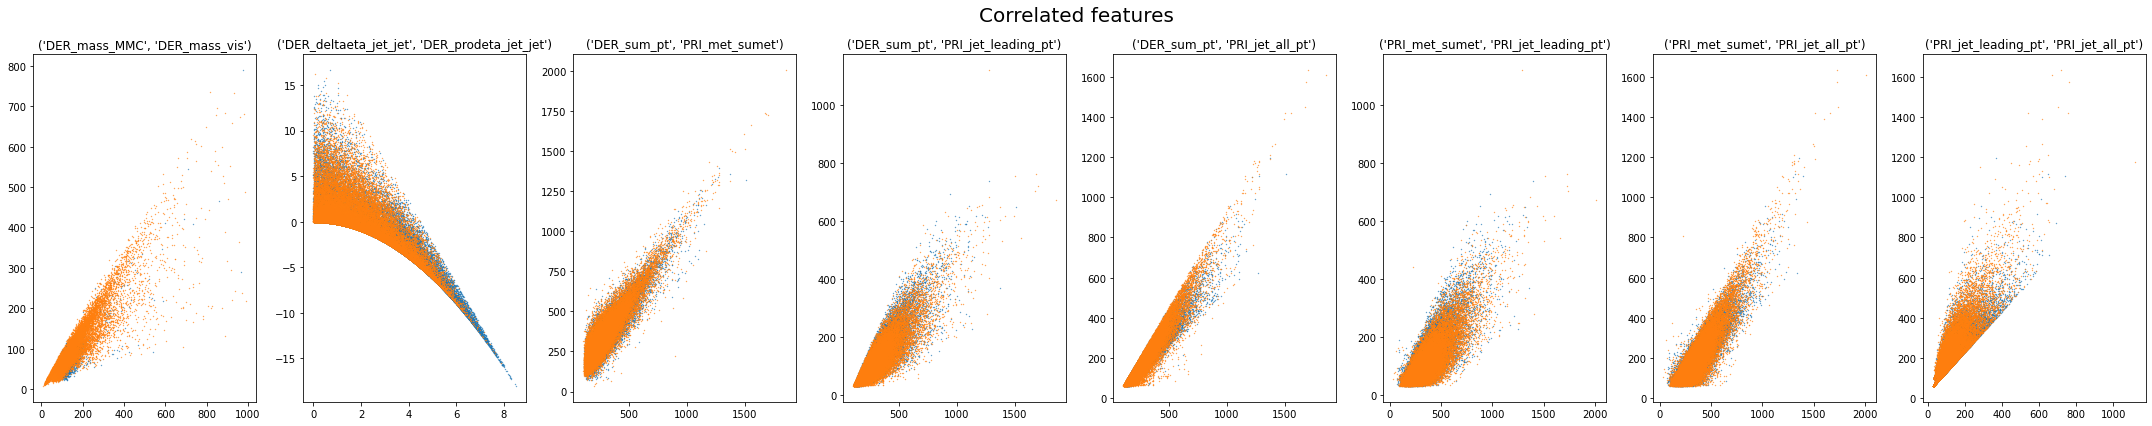

In [63]:
#correlation visualiation
fig, axs = plt.subplots(1,len(corr_pairs), figsize=(30,6))
for i in range(len(corr_pairs)): 
    axs[i].scatter(train_data_s[corr_pairs[i][0]],train_data_s[corr_pairs[i][1]], s=0.1)
    axs[i].scatter(train_data_b[corr_pairs[i][0]],train_data_b[corr_pairs[i][1]], s=0.1)
    axs[i].set_title(f'{corr_pairs[i]}')

fig.suptitle('Correlated features',  fontsize=20)
fig.tight_layout()